In [3]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

L = 20

In [4]:
choix = input('Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement')
print('Vous avez choisi le choix :',choix)
choix = int(choix)

Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement2
Vous avez choisi le choix : 2


In [5]:
if choix == 1:
    x = input('i_0 = ?')
    x = float(x)
    y = input('j_0 = ?')
    y = float(y)
else:
    liste1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
    liste2 = liste1
    x = choice(liste1)
    y = choice(liste2)
    print(x)
    print(y)

1
1.2


In [6]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape

In [7]:
Matrice


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [8]:
def foyer():
    i = randint(2,L-2)
    j = randint(2,L-2)
    Matrice[i,j] = Matrice[i,j] + 2
    return (i, j)
    print(i, j)

In [9]:
i,j = foyer()


In [13]:
E = input('Combien de cases neutres voulez vous?')
E = int(E)
def case_neutre(Matrice,i,j):
    for h in range(E):
        i_ = randint(2,L-2)
        j_ = randint(2,L-2)
        if i != i_ and j!= j_ :
            Matrice[i_,j_] = -1


Combien de cases neutres voulez vous?5


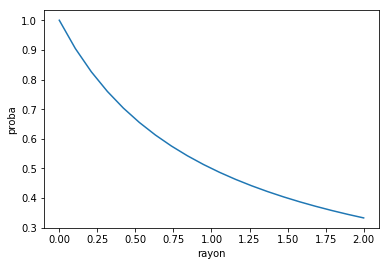

In [14]:
def proba_feu(rayon, alpha=1.0):
    p = 1.0 / ((1.0 + rayon) ** alpha)
    return p
    
r_min = 0.0
r_max = 2.0
rayons = np.linspace(r_min, r_max, num=20)
probas_feu = np.array([proba_feu(r) for r in rayons])

plt.plot(rayons, probas_feu)
plt.xlabel("rayon")
plt.ylabel("proba")

plt.show()



def matrice_proba():
    p = np.zeros((3, 3))
    i_0, j_0 = x, y
    # i_1, j_1 = ?, ?  # dépend de ventx venty
    for i in range(0, 3):
        for j in range(0, 3):
            rayon = np.sqrt((i - i_0)**2 + (j - j_0)**2)
            p[i, j] = proba_feu(rayon,alpha = 1.0)
    return p


In [15]:
p = matrice_proba()
print(p)

[[0.39031245 0.49509757 0.43847632]
 [0.45454545 0.83333333 0.55555556]
 [0.39031245 0.49509757 0.43847632]]


In [16]:
def is_in_fire(cell):
    return 2 <= cell < 3


In [17]:
def propa(ancienne_matrice,nouvelle_matrice,p,i,j):
    nouvelle_matrice[i,j] = ancienne_matrice[i,j]
    if is_in_fire(ancienne_matrice[i,j]):  # i.e. elle est en feu        
        for di in [-1, 0 ,+1]:
            for dj in [-1, 0,+1]:
                nouvelle_matrice[i +di, j+dj] = ancienne_matrice[i +di,j +dj]
                if ancienne_matrice[i +di,j +dj] == 0: # si arbre sain
                    h = np.random.binomial(1, p[di+1, dj+1])
                    nouvelle_matrice[di +i, dj +j] = h
                else :
                    nouvelle_matrice[i +di,j +dj] = ancienne_matrice[i +di,j +dj]
                ancienne_matrice[i +di,j +dj] = nouvelle_matrice[i +di,j +dj]
        nouvelle_matrice[i,j] = ancienne_matrice[i,j] + 0.5
    else :
        nouvelle_matrice[i,j] = ancienne_matrice[i,j]
    ancienne_matrice[i,j] = nouvelle_matrice[i,j]    
    return nouvelle_matrice

In [18]:
def propaM(ancienne_matrice,nouvelle_matrice,i,j) :
    nouvelle_matrice[i,j] = ancienne_matrice[i,j]
    if ancienne_matrice[i,j] == 1:
        nouvelle_matrice[i,j] = ancienne_matrice[i,j] +1
    ancienne_matrice[i,j] = nouvelle_matrice[i,j]    
    return nouvelle_matrice

In [19]:
def filter_proba(p):
    p = p ** (T_ref/T)
    return p

In [20]:
def affiche_matrice(Matrice):
    (n,m) = Matrice.shape
    for i in range(2,n-1) :
        for j in range(2,m-1) :
            if Matrice[i,j] == 0 :
                print("A", end="")
            elif Matrice[i, j] >= 2 and Matrice[i, j] < 3 :
                print("F", end="")
            elif Matrice[i, j] >= 3 :
                print(".", end="")
            elif Matrice[i,j] < 0 :
                print(" ",end="")
            elif Matrice[i,j] == 1 :
                print("M",end="")
        print("")

In [33]:
def next_step(Matrice):
    new_mat = np.zeros((L,L))
    for i in range(2,L-1):
        for j in range(2,L-1): 
            propa(Matrice, new_mat,p ,i ,j)
    for a in range(2, L-1):
        for b in range(2, L-1):
            propaM(Matrice,new_mat,a,b)
    return new_mat

In [35]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
i,j = foyer()
case_neutre(Matrice,i,j)
def simulation(Matrice):
    nb_pas = 30
    history = []
    history.append(Matrice.copy())
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        history.append(Matrice.copy())
        affiche_matrice(Matrice)
        print("")
simulation(Matrice)

AAAAAAAAAAAAAAA A
AAAAAAAAAAAAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAA AAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAFAAAA
A AAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAA AAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAA A
AAAAAAAAAAAAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAA AAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAFAAA
AAAAAAAAAAAFFAAAA
A AAAAAAAAAAFAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAA AAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAA A
AAAAAAAAAAAAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAA AAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAFFFAA
AAAAAAAAAAAFFFAAA
AAAAAAAAAAAF.FAAA
A AAAAAAAAFFFFAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAA AAA
AAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAA A
AAAAAAAAAAAAAAAAA
AAAAAAA AAAAAAAAA
AAAAAAAAAAAAAAAAA
AAAAAAA

.................
..... ...........
.................
.................
.................
.................
.................
. ...............
.................
.................
............. ...
.................
.................

............... .
.................
....... .........
.................
.................
..... ...........
.................
.................
.................
.................
.................
. ...............
.................
.................
............. ...
.................
.................

............... .
.................
....... .........
.................
.................
..... ...........
.................
.................
.................
.................
.................
. ...............
.................
.................
............. ...
.................
.................

............... .
.................
....... .........
.................
.................
..... ...........
.................
.................
.......

In [32]:
def simulation(Matrice):
    nb_pas = 100
    history = []
    history.append(Matrice.copy())
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        history.append(Matrice.copy())
        affiche_matrice(Matrice)
        print("")
    return history

In [ ]:
simulation(Matrice)